# Breast Cancer ConvNet Model
---

### Workflow:

    --> Image Normalization (staintools/spams) 
        --> Generate Patches (512x512 patches sklearn) 
            --> Augment Dataset (keras ImageDataGenerator) 
                --> CNN: main 
                            >>> built
                --> CNN: UNet
                --> CNN: InceptionV3
                

---

[Link to Normalization Notebook](./tech_image_preprocessing.ipynb)

---

In [1]:
import staintools
from PIL import Image
import numpy as np
import pandas as pd
import sklearn as sk

In [2]:
from staintools import ReinhardNormalizer, MacenkoNormalizer, VahadaneNormalizer
from staintools.utils.visual import read_image, show, show_colors, build_stack, patch_grid
import os

In [3]:
i1 = read_image("/Volumes/SD Ext/capstone_datasets/breasthistology/Training_data/Benign/t59.tif")

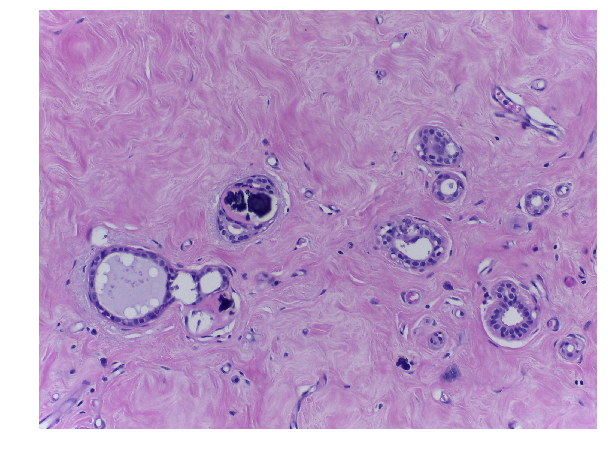

In [71]:
show(i1)

In [62]:
for 


/Users/saqibnizami/notebooks/DSI-US-4/Capstone


In [48]:
images = []
with os.scandir("/Volumes/SD Ext/capstone_datasets/breasthistology/Training_data") as scan:
    for entry in scan:
        if not entry.name.startswith("."):
            with os.scandir(entry.path) as sub:
                for file in sub:
                    if file.name.endswith('.tif'):
                        try:
                            img = Image.open(file.path)
                            images.append(img)
                            print("{} --> LOADED {}".format(entry.name, file.name))
                        except:
                            print("ERROR: /{}/ LOAD FAILURE: {}".format(entry.name, file.name))
                            pass
                    
                    
            

ERROR: /Benign/ LOAD FAILURE: 69.tif
Benign --> LOADED t0.tif
Benign --> LOADED t1.tif
Benign --> LOADED t10.tif
Benign --> LOADED t11.tif
Benign --> LOADED t12.tif
Benign --> LOADED t13.tif
Benign --> LOADED t14.tif
Benign --> LOADED t15.tif
Benign --> LOADED t16.tif
Benign --> LOADED t17.tif
Benign --> LOADED t18.tif
Benign --> LOADED t19.tif
Benign --> LOADED t2.tif
Benign --> LOADED t20.tif
Benign --> LOADED t21.tif
Benign --> LOADED t22.tif
Benign --> LOADED t23.tif
Benign --> LOADED t24.tif
Benign --> LOADED t25.tif
Benign --> LOADED t26.tif
Benign --> LOADED t27.tif
Benign --> LOADED t28.tif
Benign --> LOADED t29.tif
Benign --> LOADED t3.tif
Benign --> LOADED t30.tif
Benign --> LOADED t31.tif
Benign --> LOADED t32.tif
Benign --> LOADED t33.tif
Benign --> LOADED t34.tif
Benign --> LOADED t35.tif
Benign --> LOADED t36.tif
Benign --> LOADED t37.tif
Benign --> LOADED t38.tif
Benign --> LOADED t39.tif
Benign --> LOADED t4.tif
Benign --> LOADED t40.tif
Benign --> LOADED t41.tif
Benign

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [54]:
for x in images:
    img = read_image(x.filename)
    show(img)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/iostream.py", line 120, in _handle_event
  File "/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/iostream.py", line 212, in <lambda>
  File "/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/iostream.py", line 220, in _really_send
  File "/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/zmq/sugar/socket.py", line 438, in 

Traceback (most recent call last):
  File "/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-54-6e2fa969d65d>", line 2, in <module>
    img = read_image(x.filename)
  File "/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/staintools/utils/visual.py", line 27, in read_image
    im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
cv2.error: OpenCV(3.4.1) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor


During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'error' object has no attribute '_render_traceback_'


ERROR:tornado.general:Uncaught exception in zmqstream callback
Traceback (most recent call last):
  File "/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/iostream.py", line 120, in _handle_event
  File "/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/iostream.py", line 212, in <lambda>
  File "/Users/sa

#### CNN Model:

In [1]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, InputLayer, Input, Activation, BatchNormalization
from keras.models import Sequential, Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras import backend

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
'''Model Architecture'''

# 0. input layer
inlayer = Input(shape=(512, 512, 3), name='l0_input')

# 1. batch normalization  
x = BatchNormalization(momentum=0.9, name='l1_batch')(inlayer)

# 2. convolution 
x = Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), 
           padding='valid', activation='relu', name='l2_conv1')(x)

# 3. pooling
x = MaxPool2D(pool_size=(3,3), strides=(3,3), 
              padding='valid', name='l3_pool1')(x)

# 4. convolution
x = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), 
           padding='valid', activation='relu', name='l4_conv2')(x)

# 5. pooling
x = MaxPool2D(pool_size=(2,2), strides=(2,2), 
              padding='valid', name='l5_pool2')(x)

# 6. convolution
x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), 
           padding='same', activation='relu', name='l6_conv3')(x)

# 7. pooling 
x = MaxPool2D(pool_size=(3,3), strides=(3,3), 
              padding='valid', name='l7_pool3')(x)

# 8. convolution
x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), 
           padding='same', activation='relu', name='l8_conv4')(x)

# 9. pooling
x = MaxPool2D(pool_size=(3,3), strides=(3,3), 
              padding='valid', name='l9_pool4')(x)

# 10. convolution
x = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), 
           padding='valid', activation='relu', name='l10_conv5')(x)

# 11. pooling
x = MaxPool2D(pool_size=(3,3), strides=(3,3), 
              padding='valid', name='l11_pool5')(x)

# 12. flatten
x = Flatten(name='l12_flatten')(x)

# 13. dense relu
x = Dense(units=256, activation='relu', name='l13_dense256')(x)

# 14. dense relu
x = Dense(units=128, activation='relu', name='l14_dense128')(x)

# 15. dense output layer, Multiclass Classification: 4 Classes
outlayer = Dense(units=4, activation='softmax', name='l15_output')(x)

# build model
model = Model(inputs=inlayer, outputs=outlayer)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l0_input (InputLayer)        (None, 512, 512, 3)       0         
_________________________________________________________________
l1_batch (BatchNormalization (None, 512, 512, 3)       12        
_________________________________________________________________
l2_conv1 (Conv2D)            (None, 510, 510, 16)      448       
_________________________________________________________________
l3_pool1 (MaxPooling2D)      (None, 170, 170, 16)      0         
_________________________________________________________________
l4_conv2 (Conv2D)            (None, 168, 168, 32)      4640      
_________________________________________________________________
l5_pool2 (MaxPooling2D)      (None, 84, 84, 32)        0         
_________________________________________________________________
l6_conv3 (Conv2D)            (None, 84, 84, 64)        18496     
__________

In [3]:
opt = optimizers.Adam(lr=.003)
batch_size = 64
loss = 'categorical_crossentropy'
metrics = ['acc',]

model.compile()

callbacks = [
    TensorBoard(log_dir = 'tensorboard_logs',
                histogram_freq = 1,
                embeddings_freq = 1)
]

In [4]:
# institute callbacks
# save model

model.save("model.h5")